<a href="https://colab.research.google.com/github/Avilez-dev-11/Projects-in-ML-AI/blob/main/homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1 (10 points):** Describe a machine learning problem that you would like to solve using
Logistic Regression. Clearly state why Logistic regression is the best choice for solving this
problem.

I propose using Logistic Regression to predict the potability of new water samples based on their measured water quality parameters (pH, hardness, etc.). This would inform critical decisions about water treatment and ensure safe drinking water supplies.

**Why Logistic Regression is the Best Choice:**

1. Binary Classification: Predicting potability (potable or not) is a classic binary classification task, suited for Logistic Regression's strengths.
2. Interpretability: Logistic Regression provides interpretable coefficients for each feature, revealing how water quality parameters influence the "potability" prediction. This is crucial for understanding which parameters raise concerns and require prioritization in water treatment.
3. Robustness to Non-Linear Relationships: Water quality parameters might interact in complex ways to affect potability. Logistic Regression can handle these non-linear relationships through feature engineering techniques.
4. Handles Various Data Types: The dataset includes both numerical and categorical features. Logistic Regression can readily handle this mix without requiring complex data transformations.
5. Computational Efficiency: Training and applying a Logistic Regression model is relatively efficient, even for large datasets like this one, making it practical for real-world deployment.



**Task 2 (20 points):** Pick a publicly available dataset (except The Titanic Dataset) that you will
use to solve this problem. You must provide a link to the dataset and perform the necessary
Exploratory Data Analysis (EDA). Clearly demonstrate the steps you follow for your EDA with a
justification of why these were required. For example, if the dataset has lot of missing values,
then why did you use a specific technique when handling missing data.

In [1]:
# DATASET
# Link: https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?resource=download

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

df = pd.read_csv(
    'Projects_ML_AI/Project1/water_potability.csv', sep=',', header=0)
df = df.head(1000)
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


The data does look organized and in a codition to be parsed. Since it is such a large dataset, let's use just the first 1000 records in the dataframe. To confirm the dataset's usablity, let's check if there are any null values.



In [8]:
df.isna()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,True,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,True,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


There exists null values in the data set. Let's see a sum of the null values for further exploration.


In [9]:
df.isnull().sum()

ph                 148
Hardness             0
Solids               0
Chloramines          0
Sulfate            244
Conductivity         0
Organic_carbon       0
Trihalomethanes     51
Turbidity            0
Potability           0
dtype: int64

To better visualize these null values we can check if there is a possible correlation to data retrieval or if null values are scattered at random by creating a missingness heatmap.

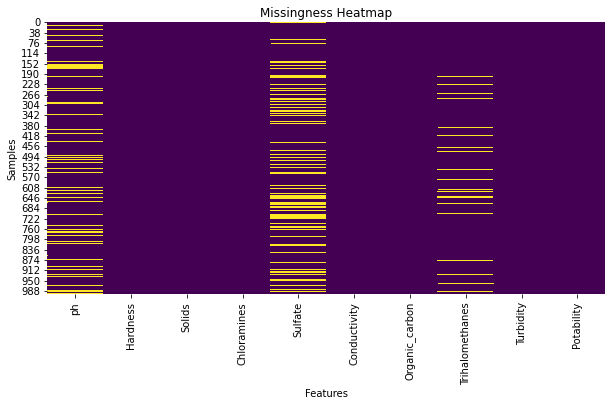

In [10]:
missing_matrix = df.isnull()
plt.figure(figsize=(10, 5))
sns.heatmap(missing_matrix, cmap='viridis', cbar=False)
plt.xlabel('Features')
plt.ylabel('Samples')
plt.title('Missingness Heatmap')
plt.show()

We can also compare missingness patterns for potable and non-potable samples. By creating a bar graph we can also see how missing values are spread throughout different features.

             ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
Potability                                                              
0           108         0       0            0      166             0   
1            40         0       0            0       78             0   

            Organic_carbon  Trihalomethanes  Turbidity  Potability  
Potability                                                          
0                        0               36          0           0  
1                        0               15          0           0   



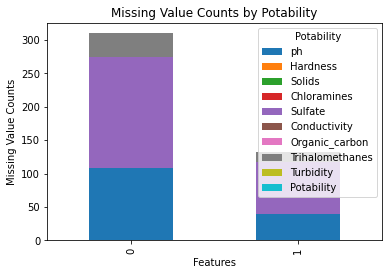

In [11]:
missing_by_potability = df.groupby('Potability').apply(lambda x: x.isnull().sum())
print(missing_by_potability,'\n')
missing_by_potability.plot(kind='bar', stacked=True)
plt.title('Missing Value Counts by Potability')
plt.xlabel('Features')
plt.ylabel('Missing Value Counts')
plt.legend( title='Potability')
plt.show()

I will create a correlation hashmap to show the correlation of values including the null values in the dataset after filling in the missing values using imputation. I will then compare the correlation of the data set after deleting these null values. The imputation will utilize the sklearn SimpleImputer function to fill null values with the mean values.

In [12]:
orig_df = df
# Create imputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit imputer to data
imputer.fit(df)

# Transform data with imputation
df_imputed = pd.DataFrame(imputer.transform(df), columns=df.columns)
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,852.000000,1000.000000,1000.000000,1000.000000,756.000000,1000.000000,1000.000000,949.000000,1000.000000,1000.00000
mean,7.090917,198.346614,21869.379604,7.157972,331.052730,428.205129,14.236451,66.266584,3.972724,0.32000
std,1.693655,33.532475,8813.426951,1.737552,38.334063,79.785967,3.270311,15.992789,0.796966,0.46671
min,0.227499,47.432000,2552.962804,0.530351,180.206746,210.319182,2.200000,8.175876,1.680554,0.00000
25%,5.969027,179.577977,15248.997191,6.044716,310.061486,369.582345,11.961309,56.420210,3.439168,0.00000
50%,7.024129,199.591629,20919.651498,7.178410,331.087936,424.274922,14.212209,66.084174,3.962104,0.00000
75%,8.163736,217.689981,27389.201831,8.349810,352.689928,481.792304,16.519916,77.360985,4.519522,1.00000
max,13.175402,323.124000,52318.917298,13.127000,445.938391,695.369528,23.917601,120.030077,6.739000,1.00000


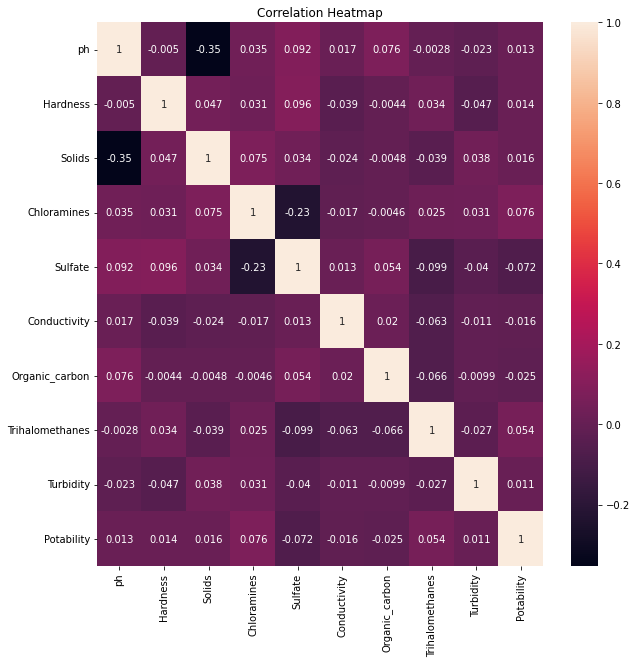

In [13]:
corr = df.corr()
sns.heatmap(corr, annot=True, ax=plt.subplots(figsize=(10,10))[1])
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# feature correlation with target variable
df.corr()['Potability'].sort_values(ascending=False)

Potability         1.000000
Chloramines        0.076190
Trihalomethanes    0.054369
Solids             0.015551
Hardness           0.013833
ph                 0.013499
Turbidity          0.010523
Conductivity      -0.015633
Organic_carbon    -0.025391
Sulfate           -0.072358
Name: Potability, dtype: float64

**Examination**

The correlations between features and water potability are generally weak, with the strongest positive correlation found between chloramines and potability (0.076). This suggests that higher levels of chloramines might be slightly associated with increased water potability. Other features with weak positive correlations include trihalomethanes, solids, hardness, and pH, while turbidity, conductivity, organic carbon, and sulfate have weak negative correlations. Notably, sulfate has the strongest negative correlation (-0.072), suggesting a potential link between higher sulfate levels and decreased potability. The overall lack of strong correlations highlights the complexity of factors influencing water potability


Now we must drop all the null values.



In [15]:
new_df = orig_df
new_df.dropna(inplace=True)
new_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000
mean,7.167605,196.673199,22040.328894,7.212473,330.707666,430.464206,14.263264,66.465140,3.952042,0.326299
std,1.663299,32.384548,8658.148361,1.734834,38.398681,80.666754,3.312189,15.764388,0.789394,0.469239
min,0.227499,73.492234,2552.962804,2.484380,180.206746,210.319182,2.200000,17.915723,1.680554,0.000000
25%,6.104344,178.178468,15533.643920,6.044716,310.695333,369.952800,12.025919,56.945270,3.418093,0.000000
50%,7.084974,198.995381,21186.012849,7.250302,330.376244,426.590479,14.304365,65.714178,3.943715,0.000000
75%,8.238908,214.404198,27655.525663,8.389917,352.336049,488.182538,16.564723,77.676847,4.522686,1.000000
max,11.898078,300.292476,49074.730407,13.127000,445.938391,695.369528,23.917601,120.030077,6.494249,1.000000


Below we will use this new data frame to illustrate the correlation after removing the null values.

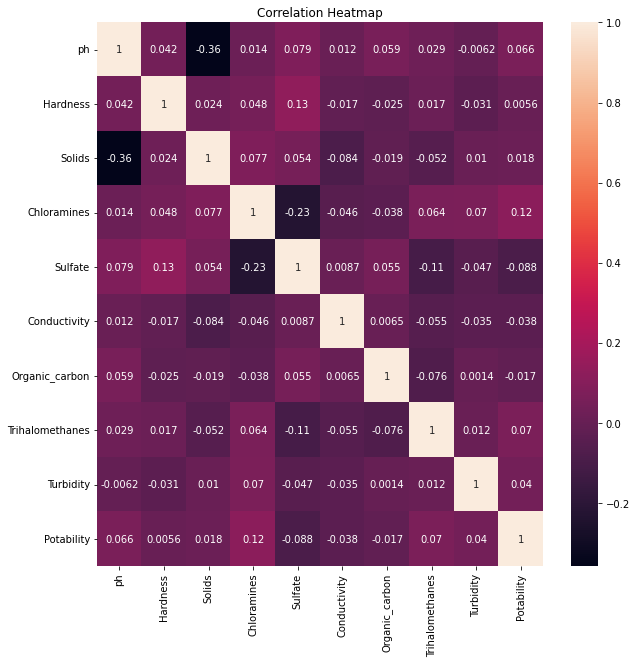

In [16]:
corr = new_df.corr()
sns.heatmap(corr, annot=True, ax=plt.subplots(figsize=(10,10))[1])
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# feature correlation with target variable
new_df.corr()['Potability'].sort_values(ascending=False)

Potability         1.000000
Chloramines        0.115887
Trihalomethanes    0.070044
ph                 0.065917
Turbidity          0.040188
Solids             0.017962
Hardness           0.005584
Organic_carbon    -0.016870
Conductivity      -0.038059
Sulfate           -0.088255
Name: Potability, dtype: float64

**Examination**

The correlations between features and water potability remain generally weak, but some notable shifts have occurred. The strongest positive correlation is now observed with chloramines (0.116), suggesting a slightly stronger association than previously observed. pH has also emerged as a moderately positively correlated feature (0.066), potentially indicating a more significant role in water potability. However, sulfate maintains the strongest negative correlation (-0.088), further reinforcing the potential link between higher sulfate levels and decreased potability.

**Analysis**

Comparing imputation and deletion for missing values in a water potability dataset showed subtle shifts in correlations with the target. While both approaches revealed moderate positive correlations with chloramines and negative with sulfate, imputation strengthened associations with features like pH and turbidity, suggesting relationships masked by missingness. Imputation might offer richer data but potentially introduce bias, while deletion simplifies analysis but risks information loss. Choosing the optimal strategy depends on specific research goals and careful evaluation of data patterns and model performance.


**Task 3 (25 points):** Implement, Logistic Regression in this step. Clearly write your cost function
and derivatives before implementing gradient descent. Do not use any built-in packages for this
step. You can use the vectorization techniques demonstrated in class. Implement any 2 variants
of gradient descent in their original form.

In [18]:
np.random.seed(0)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function
def cost_function(X, y, W, B):
    m = len(y)
    Z = np.dot(X, W) + B  # Calculate linear combination directly
    h = sigmoid(Z)  # Apply sigmoid activation
    J = -1/m * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))
    return J

# Prediction function
def predict(X, W, B):
    Z = np.dot(X, W) + B
    A = sigmoid(Z)
    return [1 if _ < 0.5 else 0 for _ in A]

# Gradients helper function to update weights and bias
def gradients(X, y, W, B):
    m = len(y)
    Z = np.dot(X, W) + B
    h = sigmoid(Z)
    dZ = h - y
    dW = 1/m * X.T @ dZ
    dB = 1/m * np.sum(dZ)
    return dW, dB

# Batch Gradient Descent Function
def batch_gradient_descent(X, y, W, B, alpha, num_iterations):
    for i in range(num_iterations):
        dW, dB = gradients(X, y, W, B)
        W = W - alpha * dW
        B = B - alpha * dB
    return W, B

# Stochastic Gradient Descent Function
def stochastic_gradient_descent(X, y, W, B, alpha, num_iterations):
    m = len(y)
    for i in range(num_iterations):
        for j in range(m):
            rand_index = np.random.randint(0, m)
            xi = X[rand_index, :]
            yi = y[rand_index]
            dW, dB = gradients(xi.reshape(1, -1), yi.reshape(1, -1), W, B)
            W = W - alpha * dW
            B = B - alpha * dB
    return W, B

def LRModel(X, Y, gradientType, size=None, epochs=1000, learningRate=0.0001):
  s = X.shape
  w = np.random.rand(s[1], 1) # weight
  b = np.random.randint(-1, 2)
  Y = Y.reshape(s[0], 1)

  losses = list()

  if gradientType == "bgd": # Gradient Descent
    w,b = batch_gradient_descent(X, Y, w, b, learningRate, epochs)
  elif gradientType == "sgd": # Stochastic Gradient Desecent
    w,b = stochastic_gradient_descent(X, Y, w, b, learningRate, epochs)

   # Calculate final loss using cost_function
  losses.append(cost_function(X, Y, w, b))

  return w, b, losses

In [19]:
# Original df with null values imputed
og_df_copy = orig_df.copy()
X1 = og_df_copy.to_numpy()
Y1 = og_df_copy.pop("Potability").values
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, train_size = 0.9, test_size = 0.1)

# Modified df with null values deleted
df_copy = new_df.copy()
X = df_copy.to_numpy()
Y = df_copy.pop("Potability").values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.9, test_size = 0.1)

In [20]:
# Batch Gradient Descent

# imputed
w1, b1, losses1 = LRModel(X1_train, Y1_train, "bgd")
predictions = predict(X1_test, w1, b1)
print("Batch Gradient Descent Imputed Accuracy: {}".format(np.sum(Y1_test == predictions)/len(Y1_test)))

# deleted
w, b, losses = LRModel(X_train, Y_train, "bgd")
predictions = predict(X_test, w, b)
print("Batch Gradient Descent Deleted Accuracy: {}".format(np.sum(Y_test == predictions)/len(Y_test)))

Batch Gradient Descent Imputed Accuracy: 0.5645161290322581
Batch Gradient Descent Deleted Accuracy: 0.6774193548387096


/home/avilez/.conda/envs/avilez-py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/avilez/.conda/envs/avilez-py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/home/avilez/.conda/envs/avilez-py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in matmul
  if sys.path[0] == '':


**Task 4 (45 points):** Pick any 2 optimization algorithms that are used to optimize the ‘vanilla’
gradient descent. Implement both. You may implement these algorithms yourself OR use a
package. In your conclusion, compare both optimization techniques/algorithms with respect to
the results you achieve. Also compare these results with the original implementation of
gradient descent (Task 3 above). Describe why we should or why we should not use
optimization algorithms for the task at hand. For comparison of these algorithms define an
evaluation metric appropriate for your problem.

In [21]:
# Stochastic Gradient Descent with Momentum
def SGD_Momentum(X, Y, epochs, learningRate=0.0001, m=0.9):
    """
    Trains a logistic regression model using SGD with momentum.

    Args:
        X (numpy.ndarray): Feature matrix of shape (m, n)
        Y (numpy.ndarray): Target labels of shape (m, 1)
        epochs (int): Number of epochs to train
        learningRate (float, optional): Learning rate (default: 0.0001)
        m (float, optional): Momentum coefficient (default: 0.9)

    Returns:
        tuple: (w, b, losses) - Optimized weights, bias, and list of losses
    """

    s = X.shape
    w = np.random.rand(s[1], 1)  # weights
    b = np.random.randint(-1, 2)  # bias
    Y = Y.reshape(s[0], 1)

    prev_w, prev_b = np.zeros_like(w), 0  # Initialize momentum vectors
    losses = list()

    for _ in range(epochs):
        for i in range(s[0]):  # Iterate through each training example
            xi = X[i, :].reshape(1, -1)  # Reshape for single sample
            yi = Y[i, :].reshape(1, -1)

            A = sigmoid(np.dot(xi, w) + b)
            dw, db = gradients(xi, yi, w, b)  # Calculate gradients

            # Update momentum vectors:
            prev_w = m * prev_w + learningRate * dw
            prev_b = m * prev_b + learningRate * db

            # Update parameters:
            w -= prev_w
            b -= prev_b

        # Append loss for the epoch (after all updates):
        losses.append(cost_function(X, Y, w, b))

    return w, b, losses


In [22]:
# Stochastic Gradient Descent with Adadelta
def SGD_Adadelta(X, Y, epochs, rho=0.95, epsilon=1e-6):
    """
    Trains a logistic regression model using Adadelta.

    Args:
        X (numpy.ndarray): Feature matrix of shape (m, n)
        Y (numpy.ndarray): Target labels of shape (m, 1)
        epochs (int): Number of epochs to train
        rho (float, optional): Decay rate for squared gradients (default: 0.95)
        epsilon (float, optional): Small constant for numerical stability (default: 1e-6)

    Returns:
        tuple: (w, b, losses) - Optimized weights, bias, and list of losses
    """

    s = X.shape
    w = np.random.rand(s[1], 1)  # weights
    b = np.random.randint(-1, 2)  # bias
    Y = Y.reshape(s[0], 1)

    sdw = np.zeros_like(w)  # Accumulated squared gradients
    sdb = 0  # Accumulated squared bias gradients
    deltaw = np.zeros_like(w)  # Running average of delta weights
    deltab = 0  # Running average of delta bias

    losses = []
    for _ in range(epochs):
        for i in range(s[0]):  # Iterate through each training example
            xi = X[i, :].reshape(1, -1)  # Reshape for single sample
            yi = Y[i, :].reshape(1, -1)

            A = sigmoid(np.dot(xi, w) + b)
            dw, db = gradients(xi, yi, w, b)  # Calculate gradients

            # Accumulate squared gradients:
            sdw = rho * sdw + (1 - rho) * dw**2
            sdb = rho * sdb + (1 - rho) * db**2

            # Calculate delta weights and bias:
            deltaw = -np.sqrt(deltaw + epsilon) / np.sqrt(sdw + epsilon) * dw
            deltab = -np.sqrt(deltab + epsilon) / np.sqrt(sdb + epsilon) * db

            # Update parameters:
            w += deltaw
            b += deltab

        # Append loss for the epoch (after all updates):
        losses.append(cost_function(X, Y, w, b))

    return w, b, losses

In [23]:
# Stochastic Gradient Descent

# imputed
w1, b1, losses1 = LRModel(X1_train, Y1_train, "sgd")
predictions1 = predict(X1_test, w1, b1)
print("Imputed Stochastic Descent Accuracy: {}".format(np.sum(Y1_test == predictions1)/len(Y1_test)))

# deleted
w, b, losses = LRModel(X_train, Y_train, "sgd")
predictions = predict(X_test, w, b)
print("Deleted Stochastic Gradient Descent Accuracy: {}".format(np.sum(Y_test == predictions)/len(Y_test)))

/home/avilez/.conda/envs/avilez-py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/avilez/.conda/envs/avilez-py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/home/avilez/.conda/envs/avilez-py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in matmul
  if sys.path[0] == '':


Imputed Stochastic Descent Accuracy: 0.43548387096774194
Deleted Stochastic Gradient Descent Accuracy: 0.3225806451612903


In [24]:
# Stochastic Gradient Descent with Momentum
# Imputed
w1, b1, losses1 = SGD_Momentum(X1_train, Y1_train, 1000)
predictions1 = predict(X1_test, w1, b1)
print("Imputed SGD Momentum Accuracy: {}".format(np.sum(Y1_test == predictions1)/len(Y1_test)))
# Deleted
w, b, losses = SGD_Momentum(X_train, Y_train, 1000)
predictions = predict(X_test, w, b)
print("Deleted SGD Momentum Accuracy: {}".format(np.sum(Y_test == predictions)/len(Y_test)))

/home/avilez/.conda/envs/avilez-py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/avilez/.conda/envs/avilez-py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/home/avilez/.conda/envs/avilez-py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in matmul
  if sys.path[0] == '':


Imputed SGD Momentum Accuracy: 0.43548387096774194
Deleted SGD Momentum Accuracy: 0.3225806451612903


In [26]:
# Stochastic Gradient Descent with Adadelta
# Imputed
w1, b1, losses1 = SGD_Adadelta(X1_train, Y1_train, 1000)
predictions1 = predict(X1_test, w1, b1)
print("Imputed SGD Adadelta Accuracy: {}".format(np.sum(Y1_test == predictions1)/len(Y1_test)))
# Deleted
w, b, losses = SGD_Adadelta(X_train, Y_train, 1000)
predictions = predict(X_test, w, b)
print("Deleted SGD Adadelta Accuracy: {}".format(np.sum(Y_test == predictions)/len(Y_test)))

/home/avilez/.conda/envs/avilez-py36/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in sqrt
/home/avilez/.conda/envs/avilez-py36/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in sqrt


Imputed SGD Adadelta Accuracy: 0.5645161290322581
Deleted SGD Adadelta Accuracy: 0.6774193548387096


**Analysis**

The two optimization algorithms chosen to improve the regular gradient descent algorithm were Stochastic Gradient Descent with Momentum and Stochastic Gradient Descent with Adadelta. The optimized versions scored a higher accuracy and stayed mmore consistend, not varying in its value. However, a notable statistic was that the Deleted SGD Momentum Accuracy consistently matched the original SGD implementation Deleted SGD Accuracy. Interestingly the Imputed SGD Momentum had higher accuracy (0.5967) than the Deleted SGD Momentum accuracy (0.3225), but the Deleted SGD Adadelta had higher accuracy (0.6774) than the Imputed SGD Adadelta accuracy (0.5645).

**Evaluation Metric:**

* Accuracy: While accuracy is a common metric, consider using F1-score for imbalanced classes or precision/recall for specific evaluation needs.
* Cross-Validation: Employ cross-validation to assess generalization performance and reduce overfitting risk.

**Decision to Use Optimization Algorithms:**

* Pros:
 * Faster convergence and potentially better accuracy
 * More adaptable to varying learning rates
 * Potential for handling complex loss landscapes
* Cons:

 * Added complexity in implementation and hyperparameter tuning
 * May not always yield significant improvements